##### Importing the necessary libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as profil

# DATA EXTRACTION STEP :

##### DATA SET LINK [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

In [3]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# DATA CLEANING STEP:

1. Handling missing values ('if there!')

In [4]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

<AxesSubplot:>

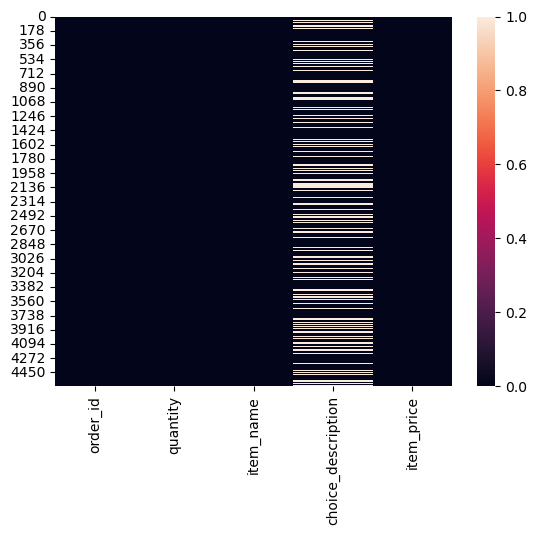

In [5]:
sns.heatmap(df.isnull())

In [6]:
df['choice_description'].fillna(df['item_name'], inplace=True)

In [7]:
df.isnull().sum()

order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64

<AxesSubplot:>

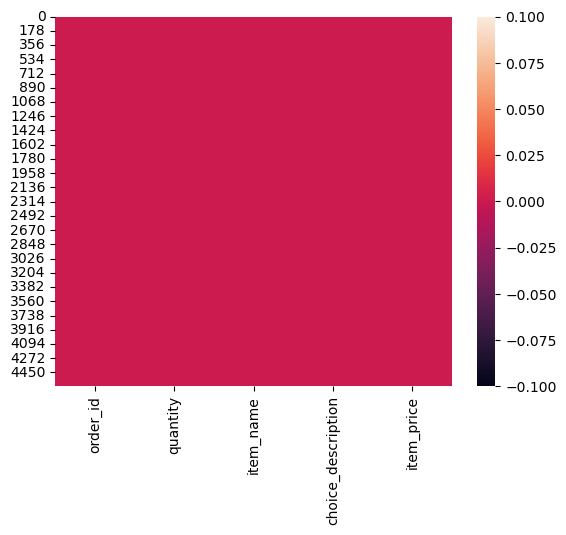

In [8]:
sns.heatmap(df.isnull())

2. Handling the incorrect data types ('if there !)

In [9]:
df.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [10]:
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)  # Convert item_price to numeric value


C:\Users\user\AppData\Local\Temp\ipykernel_6980\1514654846.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$', '').astype(float)  # Convert item_price to numeric value


In [11]:
df['item_price'].dtypes

dtype('float64')

3. Detect outliers ('if there')


In [12]:
# Calculate Z-score for each value
z_scores = np.abs((df['item_price'] - df['item_price'].mean()) / df['item_price'].std())
# Threshold for outliers (e.g., 3 standard deviations from the mean)
threshold = 45
# Identify outliers
outliers = df[z_scores > threshold]
outliers.values

array([], shape=(0, 5), dtype=object)

# DATA WRANGLING STEP:

1. Make the 'order_id' as the Index of the 'df'

In [13]:
df.set_index('order_id', inplace=True)  

In [14]:
df

,quantity,item_name,choice_description,item_price
order_id,,,,
1,1,Chips and Fresh Tomato Salsa,Chips and Fresh Tomato Salsa,2.39
1,1,Izze,[Clementine],3.39
1,1,Nantucket Nectar,[Apple],3.39
1,1,Chips and Tomatillo-Green Chili Salsa,Chips and Tomatillo-Green Chili Salsa,2.39
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...
1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25


# ANALYSIS STEP:

1. showing tha statistical describtion for the dataaa

In [15]:
df.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


2. What is the distribution of quantities sold for different items?

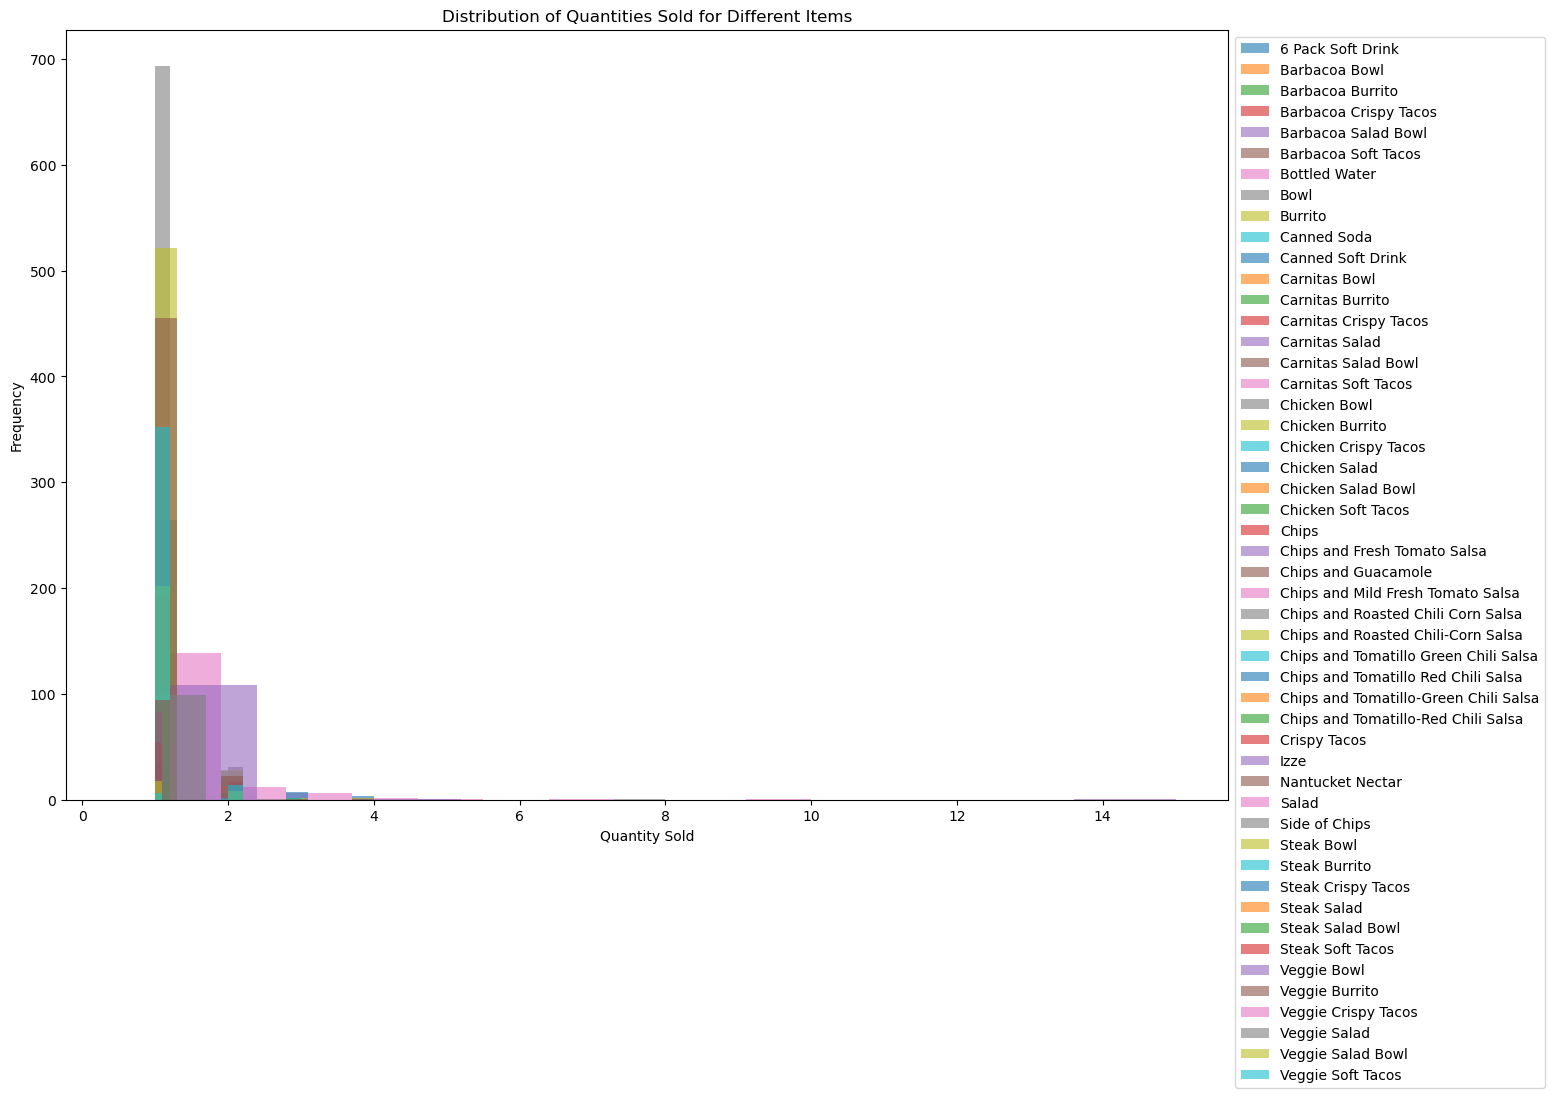

In [16]:
plt.figure(figsize=(15, 10))
for item_name, group_df in df.groupby('item_name'):
    plt.hist(group_df['quantity'], bins=10, alpha=0.6, label=item_name)

plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Quantities Sold for Different Items')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


3. Which are the top 5 most frequently ordered items?

In [17]:
top_5_orderd_items = df.nlargest(5, 'quantity')
top_5_orderd_items

,quantity,item_name,choice_description,item_price
order_id,,,,
1443,15,Chips and Fresh Tomato Salsa,Chips and Fresh Tomato Salsa,44.25
1660,10,Bottled Water,Bottled Water,15.00
1559,8,Side of Chips,Side of Chips,13.52
1443,7,Bottled Water,Bottled Water,10.50
970,5,Bottled Water,Bottled Water,7.50


4. Visualise the nummiric columns

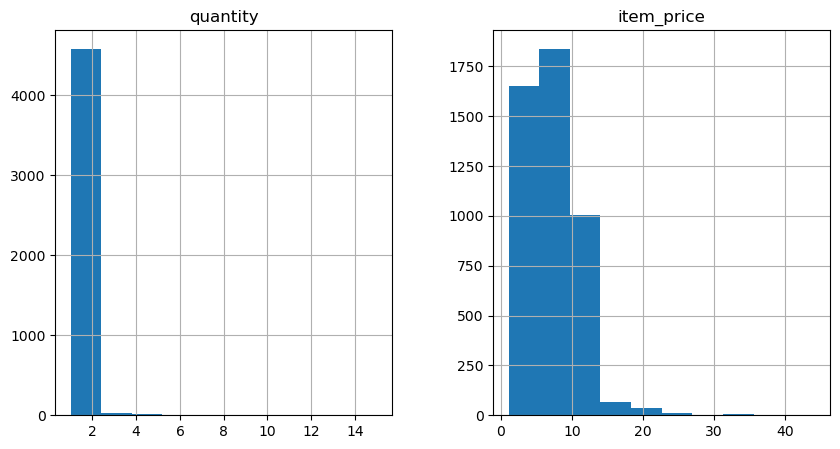

In [18]:
df.hist(figsize=(10, 5))
plt.show()

5. What are the most common choice descriptions for specific items?


In [19]:

df.groupby(['item_name', 'choice_description'])['quantity'].max()

item_name          choice_description                                                                                               
6 Pack Soft Drink  [Coke]                                                                                                               1
                   [Diet Coke]                                                                                                          2
                   [Lemonade]                                                                                                           1
                   [Nestea]                                                                                                             1
                   [Sprite]                                                                                                             1
                                                                                                                                       ..
Veggie Soft Tacos  [Fresh Tomato Salsa,

6. What is the total revenue generated from item sales?

In [20]:
df['revenue'] = df['quantity'] * df['item_price']
df['revenue'].sum()

39237.02

7. What is the average quantity of items sold per order?

In [21]:
avg_quantity_sold_per_order = df.groupby('order_id')['quantity'].mean()
pd.DataFrame(avg_quantity_sold_per_order)

,quantity
order_id,
1,1.0
2,2.0
3,1.0
4,1.0
5,1.0
...,...
1830,1.0
1831,1.0
1832,1.0


8. What are the most popular items based on total quantity sold?

In [22]:
most_popular_item = df.loc[df['quantity'].idxmax(), 'item_name']
most_popular_item

order_id
1443    Chips and Fresh Tomato Salsa
1443                   Bottled Water
1443               6 Pack Soft Drink
1443                  Veggie Burrito
1443                 Chicken Burrito
1443                   Steak Burrito
1443                   Bottled Water
Name: item_name, dtype: object

9. Sort item names  by their quantities ascendingly

In [23]:
df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)


item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


10. Visualize the correlation 

<AxesSubplot:>

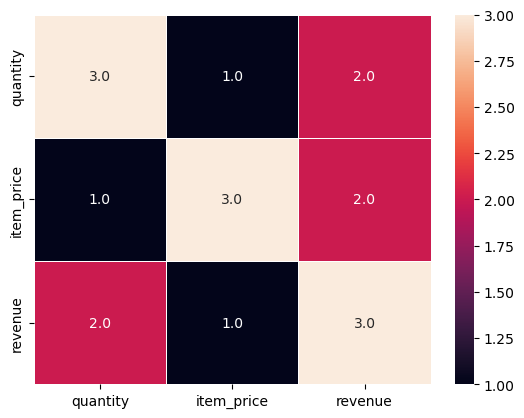

In [24]:
cor = df.corr() 
sns.heatmap(cor.rank(axis='columns'), annot=True,fmt='.1f', linewidths= .5)

11. Which item names have the highest revenue ?

In [25]:
item_revenue = df.groupby('item_name')['revenue'].max().sort_values(ascending=False)
item_revenue[[0]]

item_name
Chips and Fresh Tomato Salsa    663.75
Name: revenue, dtype: float64

### USE THE "y_data_profiling lib" to automate the EDA steps anda generate a small report about the data

In [26]:
profil.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]